# Overview
In this report, we report results of training an agent for the Bananas environment using the DQN algorithm used in the Lunar Landing environment.

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

# Read data to plot:
scores_train = pickle.load(open('data/scores_train.pkl','rb'))
scores_test = pickle.load(open('data/scores_test.pkl','rb'))
print(len(scores_train), len(scores_test))

1000 500


# Methods
## Model for estimating optimal action value function
The optimal action-value function is estimated using a 4-layer neural network model. Starting with a state with dimensions of 37, it then passes through 2 hidden layers, and arrives at the final layer which contains 4 nodes representing the available actions.

37 -> 64 -> 64 -> 4

## Deep Q-Network
The DQN algorithm is characterized by the use of 1) memory containing prior experiences (i.e. ReplayBuffer in the code) and 2) use of two neural networks representing "target" and "local" action-value functions. Using the memory allows the agent to learn more from those experiences that occur rarely, and using two neural-networks allows stable estimation of the action-value function.

Specifically, during the training session, the agent continues to add "experiences" (i.e. a tuple of state,action,reward,next_state) to its memory. At a fixed interval, the agent "learns" by getting "Q_targets" and "Q_expected" from the target and local neural-networks, calculating their loss, running backpropagation, and updating neural-network parameters. Then the target neural-network gets updated by the local neural-network by the amount controlled by "tau". These steps are repeated over multiple episodes.


In terms of hyper-parameters, the same set used in the Lunar Landing enviornment were used as shown in the table below. Parameters "eps_start", "eps_end", and "eps_decay" control how the epsilon paramter value that is used in the epsilon-greedy policy changes over different episodes. Currently, epsilon start at 1.0, then gradually decreases at the rate defined by "eps_decay", and stops at a valueof 0.01.
What this means is that the agent will uniformaly sample actions in the beginning and gradually use greedy approach to choose the action that maximizes the action-value function.

| HyperParameter      | Value | Description |
| ----------- | ----------- | |
| eps_start      | 1.0       | Starting epsilon value |
| eps_end   | 0.01        | Ending epsilon value|
| eps_decay   | 0.995        | Rate of decay of epsilon per episode|


# Results
In this section, we show results of training a DQN agent as well as those from testing a new agent with the learned weights.

As you can see in the figure for the training an agent, we can see that over the course of 1000 episodes, scores (i.e. final rewards) starts at around 0, and gradually increase, and finally stabalize around 15. Based on the Banana environment description, an average of 13+ during past 100 consecutive episodes indicates "solving" the environment. For our agent, this was achieved at around 500th episode, as can be seen in the "training_code" notebook.

To ensure that the saved learned weights of the neural-network model representing the action-value function actually are from the learned agent, we created a new agent and loaded the weights and tested the agent in the environment. In Figure 2, we can see that the agent's score does not start at zero, unlike the vanila agent, and in fact, scores fluctuate around ~14, still maintaining its ability to solve the environment. In the same figure, its histogram shows a peak at around 14.


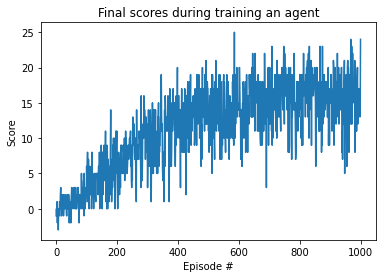

In [5]:
# Figure 1: This is a plot of final rewards over episodes during traning an agent:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_train)), scores_train)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Final scores during training an agent')
plt.show()

Mean Score: 14.108


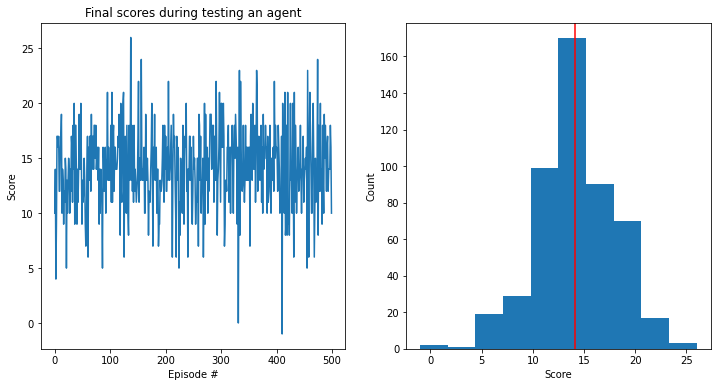

In [10]:
# Figure 2: This is a plot of rewards during testing of an agent that read learned weights from the previous training session:

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(np.arange(len(scores_test)), scores_test)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Final scores during testing an agent')

plt.subplot(1,2,2)
score_mean = np.mean(scores_test)
plt.hist(scores_test)
plt.ylabel('Count')
plt.xlabel('Score')
plt.axvline(x=score_mean, color='red')

print('Mean Score:', score_mean)

# Discussion
To improve the performance of the agent, we could try newer methods/techniques that were mentioned in the course. These include double DQN, dueling DQN, and prioritized experience replay.
Also, rather than taking the 37-dimensioned state as input, we could take the raw pixels from the environment as input, feed them to neural networks with CNN (Convolutional Neural Network), and train the agent. Using raw pixels may enable improved perception of the environment, thereby improving the agent's performance further.